In [1]:
import datadotworld as dw
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

In [2]:
# data.world location of the datafile
data_source = 'dakimova/medicare-top-drugs-analysis'
# let's compare data dictionaries between the 3 different files
# 2015 file(2011-2015)
data_dict_2015 = dw.query(data_source, 'SELECT * FROM dakimova.medicare_top_drugs_analysis.variables_2').dataframe
# 2016 file (2012-2016)
data_dict_2016 = dw.query(data_source, 'SELECT * FROM data_dictionary').dataframe
# 2017 file (2013-2017)
data_dict_2017 = dw.query(data_source, 'SELECT * FROM data_dictionary_4').dataframe

In [3]:
pd.merge(data_dict_2017, data_dict_2016, on = "variable_name", how = "outer", suffixes = ('_17', '_16'))

,variable_name,description_17,description_16
0,Brand Name,The name of the drug filled. This includes bot...,The name of the drug filled. This includes bot...
1,Number of Manufacturers,Number of manufacturers for each drug.,Number of manufacturers for each drug.
2,Total Spending,Aggregate drug spending for the Medicare Part ...,Aggregate drug spending for the Part D program...
3,Total Dosage Units,The sum of the dosage units of medication disp...,The sum of the dosage units of medication disp...
4,Total Claims,Number of prescription fills for each drug. In...,Number of prescription fills for each drug. In...
5,Generic Name,A term referring to the chemical ingredient of...,A term referring to the chemical ingredient of...
6,Manufacturer,Name of the manufacturer of the drug.,Name of the manufacturer of the drug.
7,Total Beneficiaries,Number of Part D beneficiaries utilizing the d...,Number of Medicare Part D beneficiaries utiliz...
8,Average Spending Per Dosage Unit (Weighted),Medicare Part D drug spending divided by the n...,Part D drug spending divided by the number of ...
9,Average Spending Per Claim,Part D drug spending divided by the number of ...,Total Part D drug spending divided by the numb...


In [4]:
# problem with the 2015 data dictionary import to data.world - 2 rows were converted to column names
print(data_dict_2015.columns)
data_dict_2015 = data_dict_2015.rename(index = str, columns = {data_dict_2015.columns[0]:"variable_name", data_dict_2015.columns[1]:"description"})
print(data_dict_2015.columns)
# recreate the missing rows:
data_2015_miss = pd.DataFrame({"variable_name" : ['Brand Name', 'Generic Name'],
                               "description" : ['First databank brand name of the drug', "First databank generic name of the drug"]})
data_2015_miss

Index(['brand_name_generic_name', 'first_databank_brand_name_of_the_drug_first_databank_generic_name_of_the_drug'], dtype='object')
Index(['variable_name', 'description'], dtype='object')


,variable_name,description
0,Brand Name,First databank brand name of the drug
1,Generic Name,First databank generic name of the drug


In [5]:
data_dict_2015_fix = data_2015_miss.append(data_dict_2015, ignore_index = True)
data_dict_2015_fix

,variable_name,description
0,Brand Name,First databank brand name of the drug
1,Generic Name,First databank generic name of the drug
2,Claim Count,Number of Medicare Part D Prescription Drug Ev...
3,Total Spending,Aggregate drug spending for the Part D program.
4,Beneficiary Count,Number of Medicare Part D beneficiaries utiliz...
5,Total Annual Spending per User,Total Spending divided by the number of unique...
6,Unit Count,Total dosage units of medication dispensed acr...
7,Average Cost per Unit,Total Spending divided by the number of dosage...
8,"Beneficiary Count, No LIS",Number of Medicare Part D beneficiaries utiliz...
9,"Average Beneficiary Cost Share, No LIS",Average amount that beneficiaries without a LI...


In [6]:
# view full columns
pd.set_option('display.max_colwidth', -1)

In [7]:
dict_17_15_merge = pd.merge(data_dict_2017, data_dict_2015_fix, on = "variable_name", how = "outer", suffixes = ("_17", "_15"))
dict_17_15_merge

,variable_name,description_17,description_15
0,Brand Name,The name of the drug filled. This includes both brand names (drugs that have a trademarked name) and generic names (drugs that do not have a trademarked name).,First databank brand name of the drug
1,Number of Manufacturers,Number of manufacturers for each drug.,NaN
2,Total Spending,Aggregate drug spending for the Medicare Part D program during the benefit year.,Aggregate drug spending for the Part D program.
3,Total Dosage Units,"The sum of the dosage units of medication dispensed across the calendar year (e.g. number of tablets, grams, milliliters or other units). Unit refers to the drug unit in the lowest dispensable amount.",NaN
4,Total Claims,Number of prescription fills for each drug. Includes original prescriptions and refills.,NaN
5,Generic Name,A term referring to the chemical ingredient of a drug rather than the trademarked brand name under which the drug is sold.,First databank generic name of the drug
6,Manufacturer,Name of the manufacturer of the drug.,NaN
7,Total Beneficiaries,Number of Part D beneficiaries utilizing the drug during the benefit year.,NaN
8,Average Spending Per Dosage Unit (Weighted),"Medicare Part D drug spending divided by the number of dosage units, which is weighted by the proportion of total claims.",NaN
9,Average Spending Per Claim,Part D drug spending divided by the number of prescription fills.,NaN


Columns in the 2017 df not in 2015:
* Manufacturer
* Number of Manufacturers
* Change in Average Spending Per Dosage Unit (2016-2017)  (similar column is present in the 2016 df, but for different years)
* Annual Growth Rate in Average Spending Per Dosage Unit (2013-2017)  (similar column is present in the 2016 df, but for different years)

Columns in 2015 df not in the 2016/2017 dfs:
* LIS-related columns? - will need to explore the data itself to make sure
* Annual Change in Average Cost per Unit (2015 only)

It looks like some of the columns match between the two datasets, but just have different names. Here are the columns that may contain similar data (based on description):
* Total Claims (2017) - Claim Count (2015)
* Total Beneficiaries (2017) - Beneficiary Count (2015)
* Average Spending Per Beneficiary (2017) - Total Annual Spending per User (2015)
* Total Dosage Units (2017) - Unit Count (2015)
* Average Spending Per Dosage Unit (Weighted) (2017) - Average Cost per Unit (2015)

Now to import the data itself:

In [8]:
# 2011-2015 spending
spend_2015 = dw.query(
    data_source,
    'SELECT * FROM dakimova.medicare_top_drugs_analysis.data_2'
).dataframe.replace(r'^\s+$', np.nan, regex = True)
# 2012-2016 spending
spend_2016 = dw.query(
    data_source, 
    'SELECT * FROM manufacturer_summary'
).dataframe.replace(r'^\s+$', np.nan, regex = True)
# 2013-2017 spending
spend_2017 = dw.query(
    data_source,
    'SELECT * FROM manufacturer_summary_4'
).dataframe.replace(r'^\s+$', np.nan, regex = True)

In [9]:
print(spend_2015.columns[0:10])
print(spend_2016.columns[0:10])
print(spend_2017.columns[0:10])

Index(['brand_name', 'generic_name', 'claim_count_2011', 'total_spending_2011',
       'beneficiary_count_2011', 'total_annual_spending_per_user_2011',
       'unit_count_2011', 'average_cost_per_unit_weighted_2011',
       'beneficiary_count_no_lis_2011',
       'average_beneficiary_cost_share_no_lis_2011'],
      dtype='object')
Index(['brand_name', 'generic_name', 'manufacturer', 'total_spending',
       'total_dosage_units', 'total_claims', 'total_beneficiaries',
       'average_spending_per_dosage_unit_weighted',
       'average_spending_per_claim', 'average_spending_per_beneficiary'],
      dtype='object')
Index(['brand_name', 'generic_name', 'manufacturer', 'total_spending',
       'total_dosage_units', 'total_claims', 'total_beneficiaries',
       'average_spending_per_dosage_unit_weighted',
       'average_spending_per_claim', 'average_spending_per_beneficiary'],
      dtype='object')


In [10]:
# 2015
spend_2015['brand_name'] = spend_2015['brand_name'].str.lower().str.strip()
spend_2015['generic_name'] = spend_2015['generic_name'].str.lower().str.strip()
# 2016
spend_2016['brand_name'] = spend_2016['brand_name'].str.lower().str.strip()
spend_2016['generic_name'] = spend_2016['generic_name'].str.lower().str.strip()
spend_2016['manufacturer'] = spend_2016['manufacturer'].str.lower().str.strip()
# 2017
spend_2017['brand_name'] = spend_2017['brand_name'].str.lower().str.strip()
spend_2017['generic_name'] = spend_2017['generic_name'].str.lower().str.strip()
spend_2017['manufacturer'] = spend_2017['manufacturer'].str.lower().str.strip()

In [11]:
spend_2015

,brand_name,generic_name,claim_count_2011,total_spending_2011,beneficiary_count_2011,total_annual_spending_per_user_2011,unit_count_2011,average_cost_per_unit_weighted_2011,beneficiary_count_no_lis_2011,average_beneficiary_cost_share_no_lis_2011,...,total_spending_2015,beneficiary_count_2015,total_annual_spending_per_user_2015,unit_count_2015,average_cost_per_unit_weighted_2015,beneficiary_count_no_lis_2015,average_beneficiary_cost_share_no_lis_2015,beneficiary_count_lis_2015,average_beneficiary_cost_share_lis_2015,annual_change_in_average_cost_per_unit_2015
0,10 wash,sulfacetamide sodium,24.0,1.569190e+03,16.0,98.074375,5.170000e+03,0.303518,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1st tier unifine pentips,"pen needle, diabetic",2472.0,5.766673e+04,893.0,64.576405,2.931600e+05,0.196766,422.0,42.347204,...,2.578956e+05,5173.0,49.854172,1.335132e+06,0.193205,2878.0,27.305271,2295.0,3.987891,0.022208
2,1st tier unifine pentips plus,"pen needle, diabetic",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.339665e+04,1470.0,49.929694,3.698860e+05,0.198430,710.0,28.071930,760.0,3.510776,NaN
3,60pse-400gfn-20dm,guaifenesin/dm/pseudoephedrine,12.0,3.501000e+02,11.0,31.827273,4.970000e+02,0.704427,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8-mop,methoxsalen,11.0,9.003260e+03,NaN,NaN,2.980000e+02,30.212282,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,a-b otic,antipyrine/benzocaine,30.0,2.128600e+02,29.0,7.340000,4.510000e+02,0.471973,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,abacavir,abacavir sulfate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.457883e+07,9319.0,2637.496991,4.424163e+06,5.555590,2046.0,236.941960,7273.0,6.146343,-0.137496
7,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.662621e+07,1621.0,10256.763603,7.599330e+05,21.878526,377.0,945.154324,1244.0,24.187428,-0.022873
8,abelcet,amphotericin b lipid complex,363.0,4.555661e+05,97.0,4696.557732,4.902700e+04,9.292147,49.0,402.047959,...,5.528478e+05,102.0,5420.075980,4.760000e+04,11.614449,68.0,303.140000,34.0,31.550000,NaN
9,abilify,aripiprazole,2447965.0,1.469661e+09,360675.0,4074.751793,7.747481e+07,19.218621,57408.0,466.025894,...,1.572428e+09,322582.0,4874.507390,4.785505e+07,33.122425,53024.0,519.777229,269558.0,16.497839,0.139258


In [12]:
spend_2015 = spend_2015.sort_values(['brand_name', 'generic_name']).reset_index(drop=True)
spend_2016 = spend_2016.sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)
spend_2017 = spend_2017.sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)

In [13]:
spend_2017['brand_name'].equals(spend_2016['brand_name'])

False

In [14]:
spend_2016_name = spend_2016[['brand_name', 'generic_name', 'manufacturer', 'total_claims_5']]
spend_2017_name = spend_2017[['brand_name', 'generic_name', 'manufacturer', 'total_claims_4']]

In [15]:
name_16_17_merge = pd.merge(spend_2016_name, spend_2017_name, on = ["brand_name", "generic_name", "manufacturer"], how = "outer", suffixes = ("_16", "_17")).sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)

In [16]:
print(name_16_17_merge.shape)
print(name_16_17_merge.drop_duplicates().shape)

(9208, 5)
(9208, 5)


In [17]:
name_16_17_merge[name_16_17_merge['total_claims_5'] != name_16_17_merge['total_claims_4']].head(20)

,brand_name,generic_name,manufacturer,total_claims_5,total_claims_4
1,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,14318.0,14611.0
6,abacavir,abacavir sulfate,mylan instituti,98.0,NaN
7,abacavir-lamivudine,abacavir sulfate/lamivudine,prasco labs,NaN,6430.0
8,abacavir-lamivudine,abacavir sulfate/lamivudine,teva usa,NaN,7476.0
10,abelcet,amphotericin b lipid complex,sigma-tau,476.0,NaN
11,abelcet,amphotericin b lipid complex,sigma-tau/leadi,NaN,476.0
12,abilify,aripiprazole,otsuka america,97631.0,96886.0
16,abstral,fentanyl citrate,galena biopharm,801.0,NaN
20,acamprosate calcium,acamprosate calcium,teva usa,NaN,3136.0
22,acarbose,acarbose,actavis pharma,20614.0,NaN


In [18]:
name_16_17_merge[name_16_17_merge['total_claims_5'] != name_16_17_merge['total_claims_4']].sample(20)

,brand_name,generic_name,manufacturer,total_claims_5,total_claims_4
7953,sulfasalazine dr,sulfasalazine,qualitest,33571.0,NaN
680,avandia,rosiglitazone maleate,glaxosmithkline,2911.0,2772.0
6899,potassium chloride*,potassium chloride,app/fresenius k,NaN,390.0
342,alvesco,ciclesonide,sunovion pharma,19462.0,NaN
8935,vol-plus,pnv with ca#74/iron/folic acid,trigen laborato,4650.0,NaN
1083,buspirone hcl,buspirone hcl,accord healthca,NaN,94.0
298,allzital,butalbital/acetaminophen,skylar laborato,NaN,390.0
2096,demerol,meperidine hcl,validus pharmac,NaN,84.0
6590,pantoprazole sodium,pantoprazole sodium,wockhardt usa l,522.0,NaN
4699,levofloxacin*,levofloxacin,rising pharm,NaN,1407.0


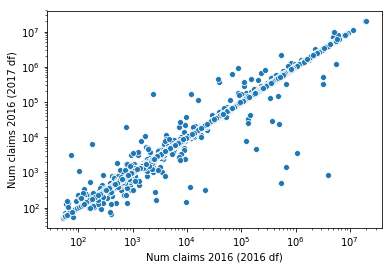

In [19]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale = "log")
sns.scatterplot(data = name_16_17_merge, x = 'total_claims_5', y = 'total_claims_4')
plt.xlabel("Num claims 2016 (2016 df)")
plt.ylabel("Num claims 2016 (2017 df)")
plt.show()

In [20]:
name_16_17_merge_2015_claims = pd.merge(
    spend_2016[['brand_name', 'generic_name', 'manufacturer', 'total_claims_4']],
    spend_2017[['brand_name', 'generic_name', 'manufacturer', 'total_claims_3']],
    on = ["brand_name", "generic_name", "manufacturer"],
    how = "outer",
    suffixes = ("_16", "_17")
).sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)

In [21]:
name_16_17_merge_2015_claims.dtypes

brand_name        object 
generic_name      object 
manufacturer      object 
total_claims_4    float64
total_claims_3    object 
dtype: object

In [22]:
name_16_17_merge_2015_claims['total_claims_3'] = pd.to_numeric(name_16_17_merge_2015_claims['total_claims_3'], errors = "ignore")

In [23]:
name_16_17_merge_2015_claims.dtypes

brand_name        object 
generic_name      object 
manufacturer      object 
total_claims_4    float64
total_claims_3    float64
dtype: object

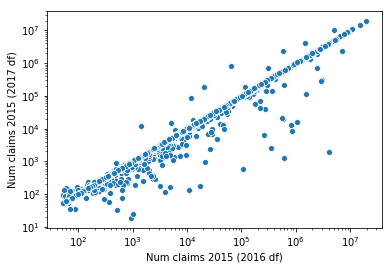

In [24]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale = "log")
sns.scatterplot(data = name_16_17_merge_2015_claims, x = 'total_claims_4', y = 'total_claims_3')
plt.xlabel("Num claims 2015 (2016 df)")
plt.ylabel("Num claims 2015 (2017 df)")
plt.show()

In [25]:
name_16_17_merge_2015_claims[name_16_17_merge_2015_claims['total_claims_4'] != name_16_17_merge_2015_claims['total_claims_3']]

,brand_name,generic_name,manufacturer,total_claims_4,total_claims_3
6,abacavir,abacavir sulfate,mylan instituti,191.0,NaN
7,abacavir-lamivudine,abacavir sulfate/lamivudine,prasco labs,NaN,NaN
8,abacavir-lamivudine,abacavir sulfate/lamivudine,teva usa,NaN,NaN
10,abelcet,amphotericin b lipid complex,sigma-tau,439.0,NaN
11,abelcet,amphotericin b lipid complex,sigma-tau/leadi,NaN,439.0
12,abilify,aripiprazole,otsuka america,1635185.0,1611148.0
16,abstral,fentanyl citrate,galena biopharm,792.0,NaN
20,acamprosate calcium,acamprosate calcium,teva usa,NaN,NaN
22,acarbose,acarbose,actavis pharma,32191.0,NaN
23,acarbose,acarbose,actavis pharma/,NaN,32191.0


In [26]:
spend_2017['brand_name'] = spend_2017['brand_name'].str.replace('*', "")
spend_2017['generic_name'] = spend_2017['generic_name'].str.replace('*', "")
spend_2017['manufacturer'] = spend_2017['manufacturer'].str.replace('*', "")

In [27]:
spend_2017 = spend_2017.sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)
spend_2017['brand_name'].equals(spend_2016['brand_name'])

False

In [28]:
spend_2017_name = spend_2017[['brand_name', 'generic_name', 'manufacturer', 'total_claims_4']]
name_16_17_merge = pd.merge(spend_2016_name, spend_2017_name, on = ["brand_name", "generic_name", "manufacturer"], how = "outer", suffixes = ("_16", "_17")).sort_values(['brand_name', 'generic_name', 'manufacturer']).reset_index(drop=True)

In [29]:
name_16_17_merge[name_16_17_merge['total_claims_5'] != name_16_17_merge['total_claims_4']].head(20)

,brand_name,generic_name,manufacturer,total_claims_5,total_claims_4
1,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,14318.0,14611.0
6,abacavir,abacavir sulfate,mylan instituti,98.0,NaN
7,abacavir-lamivudine,abacavir sulfate/lamivudine,prasco labs,NaN,6430.0
8,abacavir-lamivudine,abacavir sulfate/lamivudine,teva usa,NaN,7476.0
10,abelcet,amphotericin b lipid complex,sigma-tau,476.0,NaN
11,abelcet,amphotericin b lipid complex,sigma-tau/leadi,NaN,476.0
12,abilify,aripiprazole,otsuka america,97631.0,96886.0
16,abstral,fentanyl citrate,galena biopharm,801.0,NaN
20,acamprosate calcium,acamprosate calcium,teva usa,NaN,3136.0
22,acarbose,acarbose,actavis pharma,20614.0,NaN


In [30]:
name_16_17_merge[name_16_17_merge['total_claims_5'] != name_16_17_merge['total_claims_4']].sample(20)

,brand_name,generic_name,manufacturer,total_claims_5,total_claims_4
5389,neomycin-bacitracin-polymyxin,neomycin su/bacitra/polymyxin,valeant,5352.0,NaN
7588,tolterodine tartrate,tolterodine tartrate,macleods pharma,NaN,1971.0
6280,potassium chloride,potassium chloride,perrigo co.,704012.0,921204.0
6186,pioglitazone hcl,pioglitazone hcl,lucid pharma ll,10120.0,NaN
5277,nabumetone,nabumetone,dr.reddy's lab,NaN,59.0
7003,sertraline hcl,sertraline hcl,exelan pharmace,18248.0,18887.0
2740,eszopiclone,eszopiclone,"orchidpharma, i",NaN,48178.0
4584,low-ogestrel,norgestrel-ethinyl estradiol,mayne pharma in,NaN,1581.0
7247,sulfasalazine,sulfasalazine,qualitest/par p,NaN,77905.0
5160,monoject insulin safety syrng,"syringe with needle, insulin",sherwood,NaN,20336.0


In [31]:
print(spend_2017.shape)
print(spend_2016.shape)
print(len(spend_2017['brand_name'].unique()))
print(len(spend_2016['brand_name'].unique()))
print(len(spend_2017['manufacturer'].unique()))
print(len(spend_2016['manufacturer'].unique()))

(7216, 40)
(6842, 40)
2754
2696
577
550


In [32]:
spend_2017['manufacturer'][~spend_2017['manufacturer'].isin(spend_2016['manufacturer'])].sort_values().unique()

array(['acadia pharmace', 'acetris health', 'acorda/covis ph',
       'adapt pharma in', 'amag pharmaceut', 'amneal bioscien',
       'amring pharmace', 'aprecia pharmac', 'ariad/takeda',
       'astrazeneca/ter', 'avadel pharmace', 'biomes pharmace',
       'biotest/adma', 'carwin associat', 'cintex services',
       'claris/baxter', 'claris/renaissa', 'collegium pharm',
       'corepharma/impa', 'depomed/collegi', 'endo pharma/bio',
       'g.m. pharm', 'global/impax', 'greer laborator', 'halton laborato',
       'hikma americas,', 'hill derm/pierr', 'hospira-novaplu',
       'hospira/icu med', 'hospira/pfizer', 'impax generics',
       'insulet corpora', 'intercept pharm', 'j&j cons prod',
       'jaymac pharma', 'jazz/trupharma', 'kmr pharmaceuti',
       'kyowa kirin, in', 'leading pharma', 'mallinckrodt/pi',
       'mannkind corpor', 'meda/mylan spec', 'medicines comp.',
       'midatech pharma', 'mylan/alvogen', 'napo pharmaceut',
       'neos therapeuti', 'new haven pharm', 'ni

In [33]:
spend_2016['manufacturer'][~spend_2016['manufacturer'].isin(spend_2017['manufacturer'])].sort_values().unique()

array(['actavis elizabe', 'actavis inc (do', 'akorn/actavis',
       'alvix laborator', 'amedra/turing p', 'ar scientific',
       'ariad pharmaceu', 'astrazeneca/alm', 'bausch & lomb p',
       'bd rx inc./app', 'biotest pharmac', 'claris lifescie',
       'dara bioscience', 'duramed/barr', 'eon labs', 'fsc laboratorie',
       'fsc labs', 'genzyme/kastle', 'hi-tech pharmac', 'hill derm',
       'hospira', 'hospira/novaplu', 'humco lab.', 'hyperion/horizo',
       'innocutis holdi', 'intermune, inc.', 'karalex pharma,',
       'lucid pharma ll', 'lumara/perrigo', 'marathon/valean',
       'marnel pharm.', 'mayne pharma/h2', 'meda pharmaceut',
       'novaplus/teva', 'ortho pharm.', 'pack pharmaceut',
       'patchwerx labs,', 'pharmacia/upjhn', 'pliva, inc',
       'prestium pharma', 'prostrakan inc.', 'publix supermkt',
       'ranbaxy laborat', 'rouses/perrigo_', 'roxane labs.',
       'roxane labs./se', 'sanofi-pasteur/', 'sebela/mylan in',
       'sigma-tau', 'silarx pharm', 'stie

How much does breakdown by manufacturer matter, particularly for the pricing per unit column? (beneficiary count may vary a lot)

In [34]:
spend_2017.dtypes

brand_name                                                          object 
generic_name                                                        object 
manufacturer                                                        object 
total_spending                                                      object 
total_dosage_units                                                  object 
total_claims                                                        object 
total_beneficiaries                                                 object 
average_spending_per_dosage_unit_weighted                           object 
average_spending_per_claim                                          object 
average_spending_per_beneficiary                                    object 
total_spending_2                                                    object 
total_dosage_units_2                                                object 
total_claims_2                                                      object 
total_benefi

In [35]:
spend_2017_agg = spend_2017.groupby(['brand_name', 'generic_name']).agg(
    {'average_spending_per_dosage_unit_weighted_5': ['mean', 'median', 'std'],
     'total_spending_5': ['mean', 'median', 'std']}
)

In [36]:
spend_2017_agg

average_spending_per_dosage_unit_weighted_5  \
                                                                                                     mean   
brand_name                     generic_name                                                                 
1st tier unifine pentips       pen needle, diabetic            0.216163                                     
1st tier unifine pentips plus  pen needle, diabetic            0.217358                                     
abacavir                       abacavir sulfate                4.349258                                     
abacavir-lamivudine            abacavir sulfate/lamivudine     23.440094                                    
abacavir-lamivudine-zidovudine abacavir/lamivudine/zidovudine  21.690036                                    
abelcet                        amphotericin b lipid complex    9.865601                                     
abilify                        aripiprazole                    32.730239                                    
abilify maintena               aripiprazole                    1897.008312                                  
abraxane                       paclitaxel protein-bound        1240.761724                                  
absorica                       isotretinoin                    33.869187                                    
acamprosate calcium            acamprosate calcium             0.994096                                     
acanya                         clindamycin phos/benzoyl perox  9.608120                                     
acarbose                       acarbose                        0.389466                                     
accolate                       zafirlukast                     3.715671                                     
accupril                       quinapril hcl                   4.068178                                     
accuretic                      quinapril/hydrochlorothiazide   3.896434                                     
acebutolol hcl                 acebutolol hcl                  0.318586                                     
acetamin-caff-dihydrocodeine   acetaminophen/caff/dihydrocod   2.387592                                     
acetaminophen-codeine          acetaminophen with codeine      0.196711                                     
acetasol hc                    hydrocortisone/acetic acid      11.236723                                    
acetazolamide                  acetazolamide                   2.244595                                     
acetic acid                    acetic acid                     0.753953                                     
acetic acid-aluminum           acetic acid/aluminum acetate    0.929761                                     
acetylcysteine                 acetylcysteine                  2.020351                                     
aciphex                        rabeprazole sodium              16.926247                                    
aciphex sprinkle               rabeprazole sodium              16.301920                                    
acitretin                      acitretin                       20.212322                                    
actemra                        tocilizumab                     906.832107                                   
acthib                         haemoph b poly conj-tet tox/pf  32.282557                                    
actigall                       ursodiol                        8.595124                                     
...                                                                   ...                                   
zomig                          zolmitriptan                    68.861873                                    
zomig zmt                      zolmitriptan                    93.372791                                    
zonalon                        doxepin hcl                     15.051034                                    
zonegran                     

In [37]:
spend_2017_agg.columns = ['_'.join(col).rstrip('_') for col in spend_2017_agg.columns.values]

In [38]:
spend_2017_agg.reset_index(inplace=True)

In [39]:
spend_2017_agg_mult = spend_2017_agg[~spend_2017_agg['total_spending_5_std'].isna()]
print(spend_2017_agg_mult.columns)
print(spend_2017_agg_mult.dtypes)
type(spend_2017_agg_mult)

Index(['brand_name', 'generic_name',
       'average_spending_per_dosage_unit_weighted_5_mean',
       'average_spending_per_dosage_unit_weighted_5_median',
       'average_spending_per_dosage_unit_weighted_5_std',
       'total_spending_5_mean', 'total_spending_5_median',
       'total_spending_5_std'],
      dtype='object')
brand_name                                            object 
generic_name                                          object 
average_spending_per_dosage_unit_weighted_5_mean      float64
average_spending_per_dosage_unit_weighted_5_median    float64
average_spending_per_dosage_unit_weighted_5_std       float64
total_spending_5_mean                                 float64
total_spending_5_median                               float64
total_spending_5_std                                  float64
dtype: object


pandas.core.frame.DataFrame

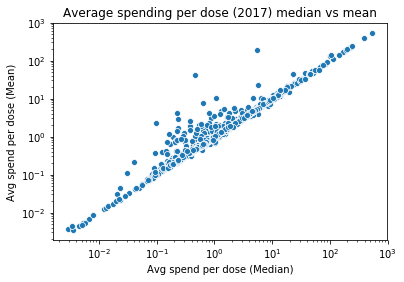

In [40]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale = "log")
sns.scatterplot(
    data = spend_2017_agg_mult,
    x = "average_spending_per_dosage_unit_weighted_5_median",
    y = "average_spending_per_dosage_unit_weighted_5_mean"
)
plt.xlabel("Avg spend per dose (Median)")
plt.ylabel("Avg spend per dose (Mean)")
plt.title("Average spending per dose (2017) median vs mean")
plt.show()

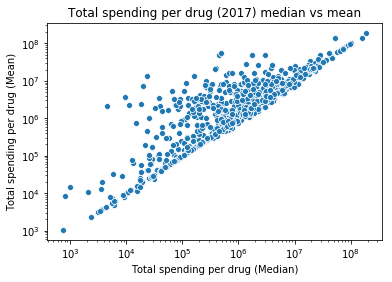

In [41]:
fig, ax = plt.subplots()
ax.set(xscale = "log", yscale = "log")
sns.scatterplot(
    data = spend_2017_agg_mult,
    x = "total_spending_5_median",
    y = "total_spending_5_mean"
)
plt.xlabel("Total spending per drug (Median)")
plt.ylabel("Total spending per drug (Mean)")
plt.title("Total spending per drug (2017) median vs mean")
plt.show()

It seems that the manufacturer breakdown does indeed contain potentially interesting information and is worth keeping. For now, trying to combine the 3 different datasets together seems like it will be too much of a time investment. Also, the 2015 dataset probably matches the manufacturer summary datasets from 2016 and 2017, rather than these datasets which breakdown the data by manufacturer.

Let's finally rename the columns first, and then double check if this is the case.

In [42]:
spend_2016.columns


Index(['brand_name', 'generic_name', 'manufacturer', 'total_spending',
       'total_dosage_units', 'total_claims', 'total_beneficiaries',
       'average_spending_per_dosage_unit_weighted',
       'average_spending_per_claim', 'average_spending_per_beneficiary',
       'total_spending_2', 'total_dosage_units_2', 'total_claims_2',
       'total_beneficiaries_2', 'average_spending_per_dosage_unit_weighted_2',
       'average_spending_per_claim_2', 'average_spending_per_beneficiary_2',
       'total_spending_3', 'total_dosage_units_3', 'total_claims_3',
       'total_beneficiaries_3', 'average_spending_per_dosage_unit_weighted_3',
       'average_spending_per_claim_3', 'average_spending_per_beneficiary_3',
       'total_spending_4', 'total_dosage_units_4', 'total_claims_4',
       'total_beneficiaries_4', 'average_spending_per_dosage_unit_weighted_4',
       'average_spending_per_claim_4', 'average_spending_per_beneficiary_4',
       'total_spending_5', 'total_dosage_units_5', 'total_cla

In [43]:
list(spend_2016)[3:10]

['total_spending',
 'total_dosage_units',
 'total_claims',
 'total_beneficiaries',
 'average_spending_per_dosage_unit_weighted',
 'average_spending_per_claim',
 'average_spending_per_beneficiary']

In [44]:
colnames = list(spend_2016)[3:10] * 5
years = ['.2012'] * 7 + ['.2013'] * 7 + ['.2014'] * 7 + ['.2015'] * 7 + ['.2016'] * 7
new_colnames_16 = []
for i in range(len(colnames)):
    new_colnames_16.append(colnames[i] + years[i])

In [45]:
print(len(spend_2016.columns))
print(len(list(spend_2016)[0:3] + new_colnames_16 + list(spend_2016)[-2:]))
spend_2016.columns = list(spend_2016)[0:3] + new_colnames_16 + list(spend_2016)[-2:]

40
40


In [46]:
list(spend_2017)[3:10] == colnames[0:7]

True

In [47]:
years_17 = ['.2013'] * 7 + ['.2014'] * 7 + ['.2015'] * 7 + ['.2016'] * 7 + ['.2017'] * 7
new_colnames_17 = []
for i in range(len(colnames)):
    new_colnames_17.append(colnames[i] + years_17[i])

In [48]:
spend_2017.columns = list(spend_2017)[0:3] + new_colnames_17 + list(spend_2017)[-2:]

In [49]:
spend_16_melt = pd.melt(frame = spend_2016, id_vars = ['brand_name', 'generic_name', 'manufacturer'])
spend_16_melt.head()

,brand_name,generic_name,manufacturer,variable,value
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,total_spending.2012,75374.2
1,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,total_spending.2012,NaN
2,abacavir,abacavir sulfate,apotex corp,total_spending.2012,NaN
3,abacavir,abacavir sulfate,aurobindo pharm,total_spending.2012,NaN
4,abacavir,abacavir sulfate,camber pharmace,total_spending.2012,NaN


In [50]:
spend_16_melt['strsplit'] = spend_16_melt['variable'].str.split('.')
spend_16_melt['variable'] = spend_16_melt['strsplit'].str.get(0)
spend_16_melt['year'] = spend_16_melt['strsplit'].str.get(1)
spend_16_melt = spend_16_melt.drop('strsplit', axis = 1)

In [51]:
print(spend_16_melt.dtypes)
spend_16_melt.head(20)

brand_name      object
generic_name    object
manufacturer    object
variable        object
value           object
year            object
dtype: object


,brand_name,generic_name,manufacturer,variable,value,year
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,total_spending,75374.2,2012
1,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,total_spending,NaN,2012
2,abacavir,abacavir sulfate,apotex corp,total_spending,NaN,2012
3,abacavir,abacavir sulfate,aurobindo pharm,total_spending,NaN,2012
4,abacavir,abacavir sulfate,camber pharmace,total_spending,NaN,2012
5,abacavir,abacavir sulfate,mylan,total_spending,10297511.84,2012
6,abacavir,abacavir sulfate,mylan instituti,total_spending,34914.16,2012
7,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,lupin pharmaceu,total_spending,NaN,2012
8,abelcet,amphotericin b lipid complex,sigma-tau,total_spending,585453.65,2012
9,abilify,aripiprazole,otsuka america,total_spending,1757978183.4,2012


In [52]:
spend_16_melt['value'] = pd.to_numeric(spend_16_melt['value'], errors = 'ignore')

In [53]:
spend_16_melt['year'] = spend_16_melt['year'].fillna("2016")

In [54]:
spend_16_tidy = spend_16_melt.pivot_table(index = ['brand_name', 'generic_name', 'manufacturer', 'year'], columns = 'variable', values = 'value').reset_index()

In [55]:
spend_16_tidy_old = spend_16_tidy.columns.tolist()

In [56]:
print(spend_16_tidy_old)
spend_16_tidy_new = spend_16_tidy_old[0:4] + spend_16_tidy_old[5:8] + spend_16_tidy_old[-4:] + [spend_16_tidy_old[4]] + [spend_16_tidy_old[-5]]

['brand_name', 'generic_name', 'manufacturer', 'year', 'annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016', 'average_spending_per_beneficiary', 'average_spending_per_claim', 'average_spending_per_dosage_unit_weighted', 'change_in_average_spending_per_dosage_unit_2015_2016', 'total_beneficiaries', 'total_claims', 'total_dosage_units', 'total_spending']


In [57]:
spend_16_tidy = spend_16_tidy[spend_16_tidy_new]

In [58]:
spend_16_tidy.head()

variable,brand_name,generic_name,manufacturer,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016,change_in_average_spending_per_dosage_unit_2015_2016
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2012,60.347638,21.734198,0.186889,1249.0,3468.0,403344.0,75374.20,NaN,NaN
1,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2013,58.356605,21.603679,0.182160,1620.0,4376.0,518920.0,94537.70,NaN,NaN
2,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2014,59.073167,21.936957,0.182074,2087.0,5620.0,677160.0,123285.70,NaN,NaN
3,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2015,58.676413,23.140136,0.186878,2283.0,5789.0,717548.0,133958.25,NaN,NaN
4,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1050323.0,215930.43,0.025783,0.107256


In [59]:
spend_16_tidy.groupby(['brand_name', 'generic_name', 'manufacturer']).count()['year'].reset_index(drop=True).value_counts()

5    4892
3    726 
2    617 
4    607 
Name: year, dtype: int64

In [60]:
spend_17_melt = pd.melt(frame = spend_2017, id_vars = ['brand_name', 'generic_name', 'manufacturer'])
spend_17_melt.head()
spend_17_melt['strsplit'] = spend_17_melt['variable'].str.split('.')
spend_17_melt['variable'] = spend_17_melt['strsplit'].str.get(0)
spend_17_melt['year'] = spend_17_melt['strsplit'].str.get(1)
spend_17_melt = spend_17_melt.drop('strsplit', axis = 1)

In [61]:
print(spend_17_melt.dtypes)
spend_17_melt.head(20)

brand_name      object
generic_name    object
manufacturer    object
variable        object
value           object
year            object
dtype: object


,brand_name,generic_name,manufacturer,variable,value,year
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,total_spending,94537.7,2013
1,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,total_spending,NaN,2013
2,abacavir,abacavir sulfate,apotex corp,total_spending,4492741.67,2013
3,abacavir,abacavir sulfate,aurobindo pharm,total_spending,3559814.51,2013
4,abacavir,abacavir sulfate,camber pharmace,total_spending,NaN,2013
5,abacavir,abacavir sulfate,mylan,total_spending,18776293.82,2013
6,abacavir-lamivudine,abacavir sulfate/lamivudine,prasco labs,total_spending,NaN,2013
7,abacavir-lamivudine,abacavir sulfate/lamivudine,teva usa,total_spending,NaN,2013
8,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,lupin pharmaceu,total_spending,78230.03,2013
9,abelcet,amphotericin b lipid complex,sigma-tau/leadi,total_spending,582002.93,2013


In [62]:
spend_17_melt['value'] = pd.to_numeric(spend_17_melt['value'], errors = 'ignore')
spend_17_melt['year'] = spend_17_melt['year'].fillna("2017")
spend_17_tidy = spend_17_melt.pivot_table(index = ['brand_name', 'generic_name', 'manufacturer', 'year'], columns = 'variable', values = 'value').reset_index()

In [63]:
spend_17_tidy.groupby(['brand_name', 'generic_name', 'manufacturer']).count()['year'].reset_index(drop=True).value_counts()

5    5074
3    739 
4    708 
2    695 
Name: year, dtype: int64

In [67]:
#spend_17_tidy.to_csv('medicare_partD_tidy_2017.csv', index = False)
#spend_16_tidy.to_csv('medicare_partD_tidy_2016.csv', index = False)

In [70]:
spend_17_tidy

variable,brand_name,generic_name,manufacturer,year,annual_growth_rate_in_average_spending_per_dosage_unit_2013_2017,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,change_in_average_spending_per_dosage_unit_2016_2017,total_beneficiaries,total_claims,total_dosage_units,total_spending
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2013,NaN,58.356605,21.603679,0.182160,NaN,1620.0,4376.0,5.189200e+05,9.453770e+04
1,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2014,NaN,59.073167,21.936957,0.182074,NaN,2087.0,5620.0,6.771600e+05,1.232857e+05
2,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2015,NaN,58.676413,23.140136,0.186878,NaN,2283.0,5789.0,7.175480e+05,1.339582e+05
3,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2016,NaN,63.082217,24.270027,0.206922,NaN,3423.0,8897.0,1.050323e+06,2.159304e+05
4,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2017,0.043716,72.061722,25.358471,0.216163,0.044660,3020.0,8582.0,1.012618e+06,2.176264e+05
5,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2014,NaN,41.963763,23.776391,0.200576,NaN,1289.0,2275.0,2.697250e+05,5.409129e+04
6,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2015,NaN,45.517725,24.979943,0.199884,NaN,4330.0,7890.0,9.860700e+05,1.970918e+05
7,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2016,NaN,58.550370,25.871001,0.216003,NaN,6456.0,14611.0,1.750607e+06,3.780012e+05
8,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2017,0.027147,67.355817,26.105077,0.217358,0.006276,5974.0,15414.0,1.851903e+06,4.023837e+05
9,abacavir,abacavir sulfate,apotex corp,2013,NaN,2125.232578,448.377412,7.148208,NaN,2114.0,10020.0,6.285130e+05,4.492742e+06


In [71]:
spend_16_tidy

variable,brand_name,generic_name,manufacturer,year,average_spending_per_beneficiary,average_spending_per_claim,average_spending_per_dosage_unit_weighted,total_beneficiaries,total_claims,total_dosage_units,total_spending,annual_growth_rate_in_average_spending_per_dosage_unit_2012_2016,change_in_average_spending_per_dosage_unit_2015_2016
0,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2012,60.347638,21.734198,0.186889,1249.0,3468.0,4.033440e+05,7.537420e+04,NaN,NaN
1,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2013,58.356605,21.603679,0.182160,1620.0,4376.0,5.189200e+05,9.453770e+04,NaN,NaN
2,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2014,59.073167,21.936957,0.182074,2087.0,5620.0,6.771600e+05,1.232857e+05,NaN,NaN
3,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2015,58.676413,23.140136,0.186878,2283.0,5789.0,7.175480e+05,1.339582e+05,NaN,NaN
4,1st tier unifine pentips,"pen needle, diabetic",owen mumford us,2016,63.082217,24.270027,0.206922,3423.0,8897.0,1.050323e+06,2.159304e+05,0.025783,0.107256
5,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2014,41.963763,23.776391,0.200576,1289.0,2275.0,2.697250e+05,5.409129e+04,NaN,NaN
6,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2015,45.517725,24.979943,0.199884,4330.0,7890.0,9.860700e+05,1.970918e+05,NaN,NaN
7,1st tier unifine pentips plus,"pen needle, diabetic",owen mumford us,2016,57.325115,25.847949,0.215836,6456.0,14318.0,1.715263e+06,3.700909e+05,0.037343,0.079807
8,abacavir,abacavir sulfate,apotex corp,2013,2125.232578,448.377412,7.148208,2114.0,10020.0,6.285130e+05,4.492742e+06,NaN,NaN
9,abacavir,abacavir sulfate,apotex corp,2014,1869.285228,410.309755,6.591545,2366.0,10779.0,6.709700e+05,4.422729e+06,NaN,NaN


In [64]:
print(len(spend_2015['brand_name'].unique()))
print(len(spend_2015[['brand_name', 'generic_name']].drop_duplicates()))
spend_2015.shape

4209
4498


(4498, 53)

In [65]:
spend_15_melt = pd.melt(frame = spend_2015, id_vars = ['brand_name', 'generic_name'])
spend_15_melt.head()

,brand_name,generic_name,variable,value
0,10 wash,sulfacetamide sodium,claim_count_2011,24.0
1,1st tier unifine pentips,"pen needle, diabetic",claim_count_2011,2472.0
2,1st tier unifine pentips plus,"pen needle, diabetic",claim_count_2011,NaN
3,60pse-400gfn-20dm,guaifenesin/dm/pseudoephedrine,claim_count_2011,12.0
4,8-mop,methoxsalen,claim_count_2011,11.0


In [66]:
spend_15_melt['year'] = spend_15_melt['variable'].str.slice(start = -4)
spend_15_melt['variable'] = spend_15_melt['variable'].str.slice(stop = -5)

In [67]:
spend_15_melt.head(10)

,brand_name,generic_name,variable,value,year
0,10 wash,sulfacetamide sodium,claim_count,24.0,2011
1,1st tier unifine pentips,"pen needle, diabetic",claim_count,2472.0,2011
2,1st tier unifine pentips plus,"pen needle, diabetic",claim_count,NaN,2011
3,60pse-400gfn-20dm,guaifenesin/dm/pseudoephedrine,claim_count,12.0,2011
4,8-mop,methoxsalen,claim_count,11.0,2011
5,a-b otic,antipyrine/benzocaine,claim_count,30.0,2011
6,a-hydrocort,hydrocortisone sod succinate,claim_count,11.0,2011
7,a-methapred,methylprednisolone sod succ,claim_count,3862.0,2011
8,abacavir,abacavir sulfate,claim_count,NaN,2011
9,abacavir-lamivudine-zidovudine,abacavir/lamivudine/zidovudine,claim_count,NaN,2011


In [68]:
spend_15_tidy = spend_15_melt.pivot_table(index = ['brand_name', 'generic_name', 'year'], columns = 'variable', values = 'value').reset_index()
spend_15_tidy.head()

variable,brand_name,generic_name,year,annual_change_in_average_cost_per_unit,average_beneficiary_cost_share_lis,average_beneficiary_cost_share_no_lis,average_cost_per_unit_weighted,beneficiary_count,beneficiary_count_lis,beneficiary_count_no_lis,claim_count,total_annual_spending_per_user,total_spending,unit_count
0,10 wash,sulfacetamide sodium,2011,NaN,NaN,NaN,0.303518,16.0,NaN,NaN,24.0,98.074375,1569.19,5170.0
1,1st tier unifine pentips,"pen needle, diabetic",2011,NaN,7.545860,42.347204,0.196766,893.0,471.0,422.0,2472.0,64.576405,57666.73,293160.0
2,1st tier unifine pentips,"pen needle, diabetic",2012,NaN,6.501223,38.242323,0.186918,1261.0,654.0,607.0,3486.0,60.099929,75786.01,405484.0
3,1st tier unifine pentips,"pen needle, diabetic",2013,NaN,5.880125,35.618511,0.182282,1633.0,800.0,833.0,4413.0,58.361353,95304.09,522780.0
4,1st tier unifine pentips,"pen needle, diabetic",2014,NaN,5.132989,32.143275,0.185352,2769.0,1288.0,1481.0,6788.0,54.441914,150749.66,813255.0


In [99]:
#spend_15_tidy.to_csv('medicare_partD_by_drug_tidy_2015.csv', index = False)

In [69]:
sum(pd.isnull(spend_15_melt['year']))

0